In [2]:
import os

import nengo
from nengo.builder.ensemble import get_activities
import nengolib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
%matplotlib inline

from nengo_learn_assoc_mem.paths import plot_path

# Setup

In [3]:
def get_alpha(acts: np.ndarray, max_act: float, color: str) -> np.ndarray:
    alpha = np.zeros((len(acts), 4))
    alpha[:, :3] = np.array(matplotlib.colors.to_rgb(color))
    alpha[:, 3] = acts / max_act
    return alpha

In [4]:
low_eval_points = nengolib.stats.ball.sample(2000, 2)
high_eval_points = nengolib.stats.ball.sample(2000, 2)

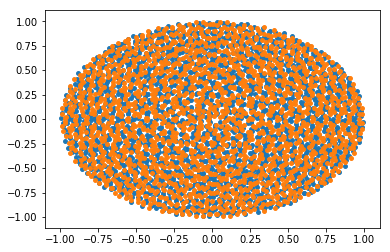

In [5]:
plt.scatter(low_eval_points[:, 0], low_eval_points[:, 1], s=15)
plt.scatter(high_eval_points[:, 0], high_eval_points[:, 1], s=15)

# Orig

In [6]:
orig_vec = np.array([[1, 0]])

with nengo.Network() as model:
    low_ens = nengo.Ensemble(1, 2, encoders=orig_vec, max_rates=[300], intercepts=[np.cos(np.pi/3)])
    high_ens = nengo.Ensemble(1, 2, encoders=orig_vec, max_rates=[300], intercepts=[np.cos(np.pi/6)])

with nengo.Simulator(model) as sim:
    pass

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [7]:
low_acts = get_activities(sim.data[low_ens], low_ens, low_eval_points).squeeze()
high_acts = get_activities(sim.data[high_ens], high_ens, high_eval_points).squeeze()

In [8]:
low_alpha = get_alpha(low_acts, np.max(low_acts), "C0")
high_alpha = get_alpha(high_acts, np.max(high_acts), "C1")

# Stim 1

In [15]:
simi_stim = np.pi/10

stim = np.array([[np.cos(simi_stim), np.sin(simi_stim)], [np.cos(simi_stim), -np.sin(simi_stim)]])

In [16]:
with nengo.Network() as model:
    low_ens = nengo.Ensemble(1, 2, encoders=[stim[0]], max_rates=[300], intercepts=[np.cos(np.pi/3)])
    high_ens = nengo.Ensemble(1, 2, encoders=[stim[0]], max_rates=[300], intercepts=[np.cos(np.pi/6)])

with nengo.Simulator(model) as sim:
    pass

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [17]:
post1_low_acts = get_activities(sim.data[low_ens], low_ens, low_eval_points).squeeze()
post1_high_acts = get_activities(sim.data[high_ens], high_ens, high_eval_points).squeeze()

In [18]:
post1_low_alpha = get_alpha(post1_low_acts, np.max(post1_low_acts), "C0")
post1_high_alpha = get_alpha(post1_high_acts, np.max(post1_high_acts), "C1")

# Stim 2

In [22]:
with nengo.Network() as model:
    low_ens = nengo.Ensemble(1, 2, encoders=[stim[1]], max_rates=[300], intercepts=[np.cos(np.pi/3)])
    high_ens = nengo.Ensemble(1, 2, encoders=[stim[0]], max_rates=[300], intercepts=[np.cos(np.pi/6)])

with nengo.Simulator(model) as sim:
    pass

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [23]:
post2_low_acts = get_activities(sim.data[low_ens], low_ens, low_eval_points).squeeze()
post2_high_acts = get_activities(sim.data[high_ens], high_ens, high_eval_points).squeeze()

In [24]:
post2_low_alpha = get_alpha(post2_low_acts, np.max(post2_low_acts), "C0")
post2_high_alpha = get_alpha(post2_high_acts, np.max(post2_high_acts), "C1")

# Plot

In [83]:
def inter_plot_base(ax, l_alpha: np.ndarray, h_alpha: np.ndarray):
    ax_unit_circ = plt.Circle((0, 0), 1, color="k", fill=False, linestyle=":", linewidth=3, alpha=0.3, zorder=0)
    ax.add_artist(ax_unit_circ)

    ax.scatter(low_eval_points[:, 0], low_eval_points[:, 1], color=l_alpha, s=pt_size)
    ax.scatter(high_eval_points[:, 0], high_eval_points[:, 1], color=h_alpha, s=pt_size, edgecolor=None)

In [84]:
def inter_plot_stim(ax):
    ax.scatter(stim[:, 0], stim[:, 1], s=stim_size, color='k', marker="X", edgecolors="white")
    ax.text(stim[0, 0]+annot_off, stim[0, 1]-annot_off, "1", fontsize=annot_size)
    ax.text(stim[1, 0]+annot_off, stim[1, 1]-annot_off, "2", fontsize=annot_size)

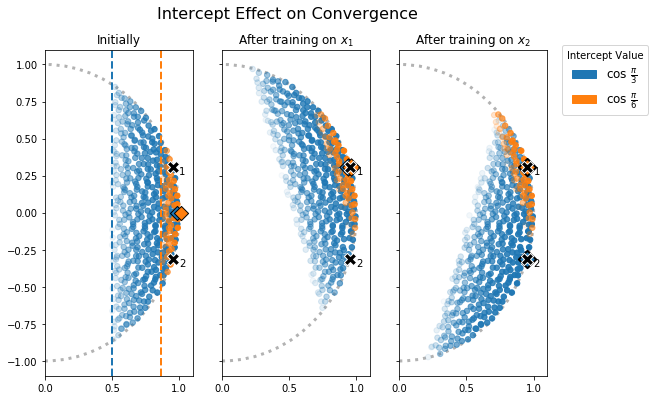

In [86]:
pt_size = 30
enc_size = 100
stim_size = 150
annot_off = .05
annot_size = 10

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(9, 6))

inter_plot_base(ax1, low_alpha, high_alpha)
ax1.scatter(orig_vec[:, 0]-0.015, orig_vec[:, 1], color="C0", s=enc_size, marker='D', edgecolors='k')
ax1.scatter(orig_vec[:, 0]+0.015, orig_vec[:, 1], color="C1", s=enc_size, marker='D', edgecolors='k')
inter_plot_stim(ax1)

ax1.axvline(np.cos(np.pi/3), color="C0", linestyle="--", linewidth=2)
ax1.axvline(np.cos(np.pi/6), color="C1", linestyle="--", linewidth=2)
ax1.set_ylim(-1.1, 1.1)
ax1.set_xlim(0, 1.1)
ax1.set_title("Initially")

inter_plot_base(ax2, post1_low_alpha, post1_high_alpha)
ax2.scatter(stim[0, 0]-0.01, stim[0, 1], color="C0", s=enc_size+50, marker="D",  edgecolors='k', linewidths=1)
ax2.scatter(stim[0, 0]+0.01, stim[0, 1], color="C1", s=enc_size+50, marker="D",  edgecolors='k', linewidths=1)
inter_plot_stim(ax2)

ax2.set_title("After training on $x_1$")

inter_plot_base(ax3, post2_low_alpha, post2_high_alpha)

ax3.scatter(stim[0, 0], stim[0, 1], color="C1", s=enc_size+50, marker="D",  edgecolors='k', linewidths=2)
ax3.scatter(stim[1, 0], stim[1, 1], color="C0", s=enc_size+50, marker="D",  edgecolors='k', linewidths=2)
inter_plot_stim(ax3)

ax3.set_title("After training on $x_2$")

fig.suptitle("Intercept Effect on Convergence", fontsize=16)

leg_handles = [
    mpatches.Patch(color="C0", label=r"$\cos\ \frac{\pi}{3}$"),
    mpatches.Patch(color="C1", label=r"$\cos\ \frac{\pi}{6}$")]
ax3.legend(handles=leg_handles, title="Intercept Value", fontsize=12, loc=(1.1, 0.8))

plt.savefig(os.path.join(plot_path, "cept_converge.pdf"), format="pdf", bbox_inches="tight")